In [29]:
# Load all files from data_generated/test/outputs/ 

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import rcParams


# Load all files from data_generated/test/outputs/ to diferet arrays
def load_data():
    # Get all files from data_generated/test/outputs/
    files = os.listdir("../archive/0_probs/test/outputs/")
    files.sort()
    # Load all files to diferent arrays names as the file name
    for file in files:
        if file == 'outputs_IsolationForest0.csv' or file == 'outputs_NN_probs0.csv' or file == 'outputs_OneClassSVM0.csv' or file == 'outputs_RandomForestClassifier0.csv' or file == 'outputs_SVC0.csv':
            globals()[file] = np.loadtxt("../data_generated/test/outputs/" + file, dtype=float)
        else:
            globals()[file] = np.loadtxt("../data_generated/test/outputs/" + file)

    return files

# Save in individuals arrays the data from the files named Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput
def save_data(files):
    # Save in individuals arrays vars the data from the files named Autoencoder, IsolationForest, NN, OneClassSVM, RandomForestClassifier, SVM, TrueOutput
    i = 0
    for file in files:
        print(file)
        i+=1
        if i == 1:
            Autoencoder = globals()[file]
        elif i == 2:
            IsolationForest = globals()[file]
        elif i == 3:
            IsolationForest0 = globals()[file]
        elif i == 4:
            NN_probs0 = globals()[file]
        elif i == 5:
            NN = globals()[file]
        elif i == 6:
            OneClassSVM = globals()[file]
        elif i == 7:
            OneClassSVM0 = globals()[file]
        elif i == 8:
            RandomForestClassifier = globals()[file]
        elif i == 9:
            RandomForestClassifier0 = globals()[file]
        elif i == 10:
            SVM = globals()[file]
        elif i == 11:
            SVM0 = globals()[file]
        elif i == 12:
            TrueOutput = globals()[file]

    return Autoencoder, IsolationForest, IsolationForest0, NN_probs0, NN, OneClassSVM, OneClassSVM0, RandomForestClassifier, RandomForestClassifier0, SVM, SVM0, TrueOutput

 
    

In [30]:
files = load_data()
Autoencoder, IsolationForest, IsolationForest0, NN_probs0, NN, OneClassSVM, OneClassSVM0, RandomForestClassifier, RandomForestClassifier0, SVM, SVM0, TrueOutput  = save_data(files)

_outputs_Autoencoder.csv
_outputs_IsolationForest.csv
_outputs_IsolationForest0.csv
_outputs_NN.csv
_outputs_NN_probs0.csv
_outputs_OneClassSVM.csv
_outputs_OneClassSVM0.csv
_outputs_RandomForestClassifier.csv
_outputs_RandomForestClassifier0.csv
_outputs_SVC.csv
_outputs_SVC0.csv
_outputs_True_y.csv


In [31]:
# print percentage of anomalies detected
print("Autoencoder")
print(np.sum(Autoencoder)/len(Autoencoder))
print("IsolationForest")
print(np.sum(IsolationForest)/len(IsolationForest))
print("NN")
print(np.sum(NN)/len(NN))
print("OneClassSVM")
print(np.sum(OneClassSVM)/len(OneClassSVM))
print("RandomForestClassifier")
print(np.sum(RandomForestClassifier)/len(RandomForestClassifier))
print("SVM")
print(np.sum(SVM)/len(SVM))
print("TrueOutput")
print(np.sum(TrueOutput)/len(TrueOutput))


Autoencoder
0.03759293028475242
IsolationForest
0.05393463318838547
NN
0.02561264609342124
OneClassSVM
0.5953850469911629
RandomForestClassifier
0.024758030579323888
SVM
0.01711319960723804
TrueOutput
0.0014923676056738395


In [32]:
# pass all the data to pandas dataframe as int
import pandas as pd

df_autoencoder = pd.DataFrame(Autoencoder.astype(int))
df_isolationforest = pd.DataFrame(IsolationForest.astype(int))
df_nn = pd.DataFrame(NN.astype(float))
df_oneclasssvm = pd.DataFrame(OneClassSVM.astype(int))
df_randomforestclassifier = pd.DataFrame(RandomForestClassifier.astype(int))
df_svm = pd.DataFrame(SVM.astype(int))
df_trueoutput = pd.DataFrame(TrueOutput.astype(int))
df_isolationforest0 = pd.DataFrame(IsolationForest0.astype(float))
df_nn_probs0 = pd.DataFrame(NN_probs0.astype(float))
df_oneclasssvm0 = pd.DataFrame(OneClassSVM0.astype(float))
df_randomforestclassifier0 = pd.DataFrame(RandomForestClassifier0.astype(float))
df_svm0 = pd.DataFrame(SVM0.astype(float))



In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_isolationforest0[0] = scaler.fit_transform(df_isolationforest0[[0]])

# Combine the scores by averaging them
# Here we assume all dataframes have the same length and corresponding indices
# 
# column of 
ensemble_scores = (df_svm0[0] + df_nn[0] + df_isolationforest0[0]) / 3

# Decide on a threshold to binarize the scores
# This threshold can be determined by cross-validation, domain knowledge, or by looking at the distribution of ensemble scores
threshold = 0.5  # Example threshold
ensemble_output = (ensemble_scores >= threshold).astype(int)

0.0

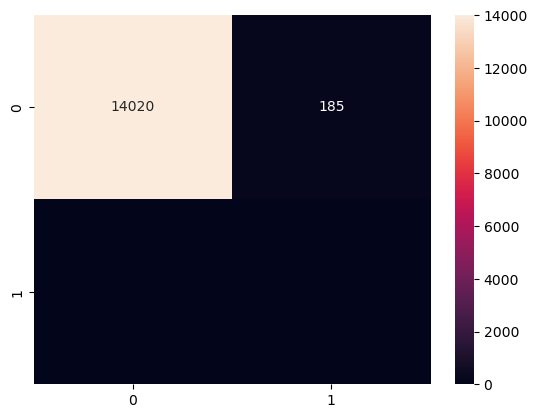

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix

df_trueoutput = df_trueoutput.head(14258)

confusion_matrix(df_trueoutput, ensemble_output)

# plot confusion matrix
import seaborn as sns

sns.heatmap(confusion_matrix(df_trueoutput, ensemble_output), annot=True, fmt='g')

# f1 score
from sklearn.metrics import f1_score

f1_score(df_trueoutput, ensemble_output)